In [1]:
# !pip install pycausalimpact

In [2]:
import pandas as pd
import pickle
import numpy as np
import scipy.stats as stats

import math
import datetime
import matplotlib.dates as mdates

from re import sub
from decimal import Decimal
import re

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from causalimpact import CausalImpact

In [3]:
median_price = pd.read_csv('../data/median_comp_price.csv')

In [4]:
median_price = median_price.drop('date.1', axis = 1 )

# median_price_t = median_price.set_index('date')

median_price_t = median_price.set_index(pd.DatetimeIndex(median_price['date']))
median_price_t.drop('date', axis=1,inplace=True)

In [5]:
# take out the first row with a null value in SF

median_price2 = median_price_t[1:]

median_price2.columns = ["x1","y"]
median_price2 = median_price2[['y', 'x1']]

# impute missing values in the control market.

median_price2['x1'] = median_price2['x1'].fillna(method = 'ffill')
# median_price2['x1_interpolated'] = median_price2['x1'].interpolate(method = 'time')

# only a few missing data points of SF prices in the pre-period

median_price2['y'] = median_price2['y'].fillna(method = 'ffill')
# median_price2['y_interpolated'] = median_price2['y'].interpolate(method = 'time')

median_price2

,y,x1
date,,
2015-09-13,135.000000,75.000000
2015-09-20,141.000000,75.000000
2015-09-27,135.000000,73.000000
2015-10-04,131.000000,71.000000
2015-10-11,130.000000,70.000000
2015-10-18,130.000000,71.000000
2015-10-25,129.000000,70.000000
2015-11-01,126.000000,70.000000
2015-11-08,120.000000,66.000000


In [6]:
for idx, dt in enumerate(list(median_price2.index)):
    print(idx, dt)

0 2015-09-13 00:00:00
1 2015-09-20 00:00:00
2 2015-09-27 00:00:00
3 2015-10-04 00:00:00
4 2015-10-11 00:00:00
5 2015-10-18 00:00:00
6 2015-10-25 00:00:00
7 2015-11-01 00:00:00
8 2015-11-08 00:00:00
9 2015-11-15 00:00:00
10 2015-11-22 00:00:00
11 2015-11-29 00:00:00
12 2015-12-06 00:00:00
13 2015-12-13 00:00:00
14 2015-12-20 00:00:00
15 2015-12-27 00:00:00
16 2016-01-03 00:00:00
17 2016-01-10 00:00:00
18 2016-01-17 00:00:00
19 2016-01-24 00:00:00
20 2016-01-31 00:00:00
21 2016-02-07 00:00:00
22 2016-02-14 00:00:00
23 2016-02-21 00:00:00
24 2016-02-28 00:00:00
25 2016-03-06 00:00:00
26 2016-03-13 00:00:00
27 2016-03-20 00:00:00
28 2016-03-27 00:00:00
29 2016-04-03 00:00:00
30 2016-04-10 00:00:00
31 2016-04-17 00:00:00
32 2016-04-24 00:00:00
33 2016-05-01 00:00:00
34 2016-05-08 00:00:00
35 2016-05-15 00:00:00
36 2016-05-22 00:00:00
37 2016-05-29 00:00:00
38 2016-06-05 00:00:00
39 2016-06-12 00:00:00
40 2016-06-19 00:00:00
41 2016-06-26 00:00:00
42 2016-07-03 00:00:00
43 2016-07-10 00:00:0

In [7]:
# median_price2.to_csv("../data/price_series_for_R_imputed_median.csv")

C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    115.6              9943.6
Prediction (s.d.)         103.3 (1.0)        8886.4 (87.1)
95% CI                    [101.3, 105.3]     [8715.1, 9056.7]

Absolute effect (s.d.)    12.3 (1.0)         1057.2 (87.1)
95% CI                    [10.3, 14.3]       [886.9, 1228.4]

Relative effect (s.d.)    11.9% (1.0%)       11.9% (1.0%)
95% CI                    [10.0%, 13.8%]     [10.0%, 13.8%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.00%

For more details run the command: print(impact.summary('report'))


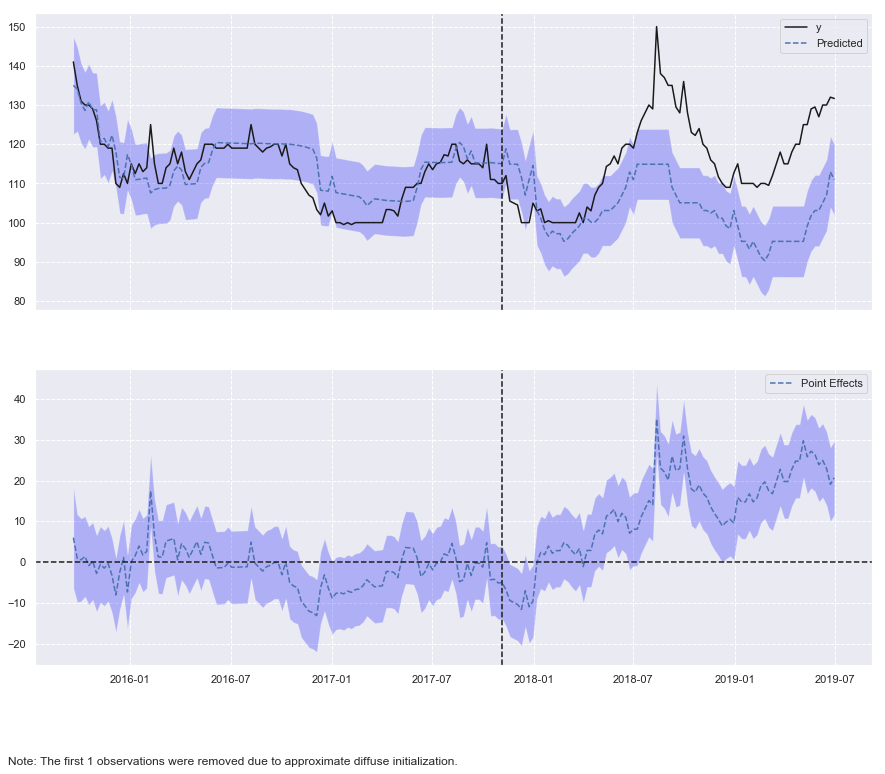

In [8]:
# Set intervention date as the week of Nov 5, 2017

pre_period = ['2015-09-13', '2017-11-05']
post_period = ['2017-11-12', '2019-06-30']

ci = CausalImpact(median_price2, pre_period, post_period)
print(ci.summary())

ci.plot(panels=['original', 'pointwise'], figsize=(15, 12))



In [9]:
infer_df1 = ci.inferences

infer_df1.to_csv('../data/causalimpact_infer_nov52017_median.csv')

infer_df1.head()

,post_cum_y,preds,post_preds,post_preds_lower,post_preds_upper,preds_lower,preds_upper,post_cum_pred,post_cum_pred_lower,post_cum_pred_upper,point_effects,point_effects_lower,point_effects_upper,post_cum_effects,post_cum_effects_lower,post_cum_effects_upper
2015-09-13,NaN,135.982703,NaN,NaN,NaN,-16451.472160,16723.437565,NaN,NaN,NaN,-0.982703,-16588.437565,16586.472160,NaN,NaN,NaN
2015-09-20,NaN,135.000000,NaN,NaN,NaN,122.548810,147.451190,NaN,NaN,NaN,6.000000,-6.451190,18.451190,NaN,NaN,NaN
2015-09-27,NaN,134.065367,NaN,NaN,NaN,123.281401,144.849333,NaN,NaN,NaN,0.934633,-9.849333,11.718599,NaN,NaN,NaN
2015-10-04,NaN,130.441777,NaN,NaN,NaN,120.273691,140.609864,NaN,NaN,NaN,0.558223,-9.609864,10.726309,NaN,NaN,NaN
2015-10-11,NaN,128.613883,NaN,NaN,NaN,118.767838,138.459928,NaN,NaN,NaN,1.386117,-8.459928,11.232162,NaN,NaN,NaN


In [10]:
print(ci.summary(output='report'))


Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 115.6. By contrast, in the absence of an
intervention, we would have expected an average response of 103.3.
The 95% interval of this counterfactual prediction is [101.3, 105.3].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 12.3 with a 95% interval of
[10.3, 14.3]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 9943.6.
By contrast, had the intervention not taken place, we would have expected
a sum of 8886.4. The 95% interval of this prediction is [8715.1, 9056.7].


The above results are given in terms of absolute numbers. In relative
terms, the response variable 

C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    117.2              8905.1
Prediction (s.d.)         101.2 (1.0)        7691.3 (78.8)
95% CI                    [99.2, 103.3]      [7539.6, 7848.7]

Absolute effect (s.d.)    16.0 (1.0)         1213.7 (78.8)
95% CI                    [13.9, 18.0]       [1056.4, 1365.4]

Relative effect (s.d.)    15.8% (1.0%)       15.8% (1.0%)
95% CI                    [13.7%, 17.8%]     [13.7%, 17.8%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.00%

For more details run the command: print(impact.summary('report'))


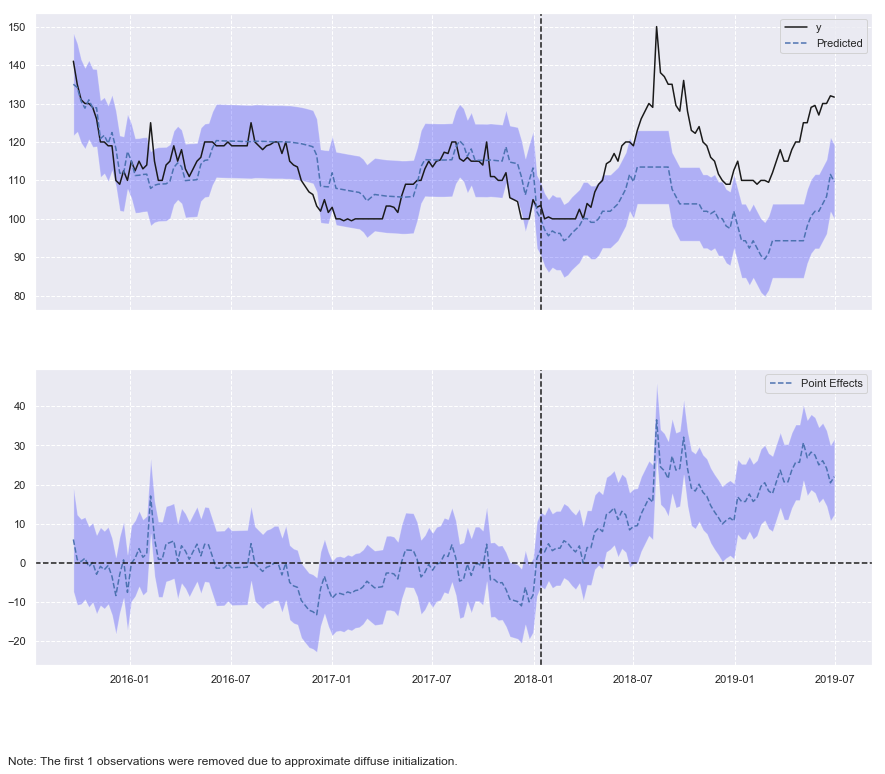

In [11]:
# set the intervention date as the week of Jan 14, 2018

pre_period = ['2015-09-13', '2018-01-14']
post_period = ['2018-01-21', '2019-06-30']

ci = CausalImpact(median_price2, pre_period, post_period)
print(ci.summary())

ci.plot(panels=['original', 'pointwise'], figsize=(15, 12))


In [12]:
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 117.2. By contrast, in the absence of an
intervention, we would have expected an average response of 101.2.
The 95% interval of this counterfactual prediction is [99.2, 103.3].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 16.0 with a 95% interval of
[13.9, 18.0]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 8905.1.
By contrast, had the intervention not taken place, we would have expected
a sum of 7691.3. The 95% interval of this prediction is [7539.6, 7848.7].


The above results are given in terms of absolute numbers. In relative
terms, the response variable s

In [13]:
infer_df2 = ci.inferences

infer_df2.to_csv('../data/causalimpact_infer_jan142018_median.csv')

infer_df2.head()

,post_cum_y,preds,post_preds,post_preds_lower,post_preds_upper,preds_lower,preds_upper,post_cum_pred,post_cum_pred_lower,post_cum_pred_upper,point_effects,point_effects_lower,point_effects_upper,post_cum_effects,post_cum_effects_lower,post_cum_effects_upper
2015-09-13,NaN,134.690000,NaN,NaN,NaN,-16730.053013,16999.433013,NaN,NaN,NaN,0.310000,-16864.433013,16865.053013,NaN,NaN,NaN
2015-09-20,NaN,135.000000,NaN,NaN,NaN,121.711867,148.288133,NaN,NaN,NaN,6.000000,-7.288133,19.288133,NaN,NaN,NaN
2015-09-27,NaN,134.167657,NaN,NaN,NaN,122.658907,145.676408,NaN,NaN,NaN,0.832343,-10.676408,12.341093,NaN,NaN,NaN
2015-10-04,NaN,130.612282,NaN,NaN,NaN,119.760889,141.463674,NaN,NaN,NaN,0.387718,-10.463674,11.239111,NaN,NaN,NaN
2015-10-11,NaN,128.792850,NaN,NaN,NaN,118.285222,139.300477,NaN,NaN,NaN,1.207150,-9.300477,11.714778,NaN,NaN,NaN


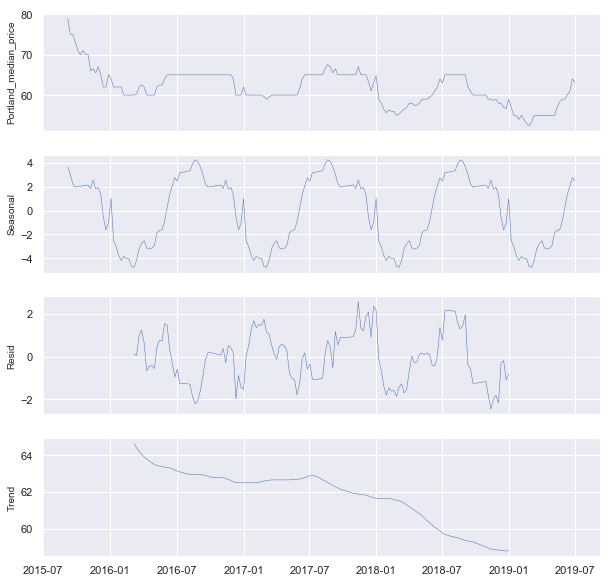

In [14]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(median_price_t.dropna()['Portland_median_price'].values, model='additive', freq= 52)  
price_decomp = median_price_t.dropna().copy()
price_decomp['trend'] = decomposition.trend
price_decomp['seasonal'] = decomposition.seasonal
price_decomp['resid'] = decomposition.resid

fig, axs = plt.subplots(4,1, figsize=(10,10), sharex=True)
columns = ['Portland_median_price','seasonal','resid','trend']

for i, ax in enumerate(axs):
#     ax.set_title('Decompostion of Weighted Average Price of Private Rooms in SOMA: May 2015 - June 2019')
    ax.plot(price_decomp.index, price_decomp[columns[i]].values, lw=.5)
    ax.set_ylabel(columns[i].capitalize(), size=10)

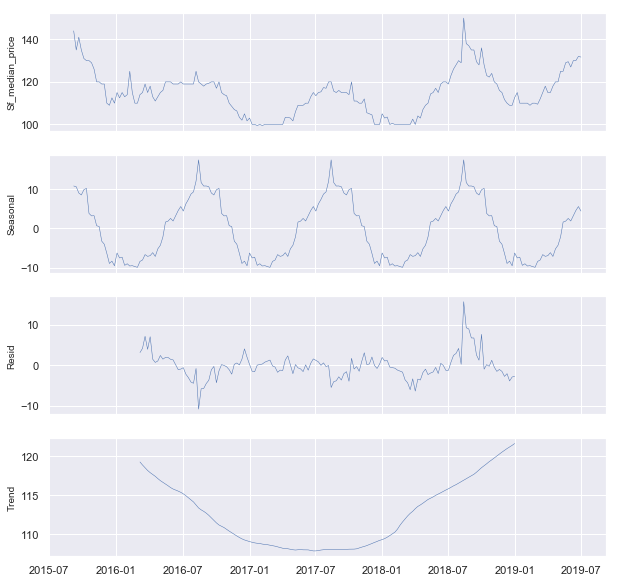

In [15]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(median_price_t.dropna()['SF_median_price'].values, model='additive', freq= 52)  
price_decomp = median_price_t.dropna().copy()
price_decomp['trend'] = decomposition.trend
price_decomp['seasonal'] = decomposition.seasonal
price_decomp['resid'] = decomposition.resid

fig, axs = plt.subplots(4,1, figsize=(10,10), sharex=True)
columns = ['SF_median_price','seasonal','resid','trend']

for i, ax in enumerate(axs):
#     ax.set_title('Decompostion of Weighted Average Price of Private Rooms in SOMA: May 2015 - June 2019')
    ax.plot(price_decomp.index, price_decomp[columns[i]].values, lw=.5)
    ax.set_ylabel(columns[i].capitalize(), size=10)
# ax.vline(x= datetime.date(2018,1,16), color = 'red', linestyle='--',label='SF Regulation Compliance Deadline')